In [ ]:
%config Completer.use_jedi=False # comment if not needed

#Import pandas library
import pandas as pd

#Import numpy library
import numpy as np

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
# Reading the dataset in a dataframe
df = pd.read_csv('/content/cancer_dataset.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
# Print unique values of the target columns of the dataset
for target in ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
    print(f"Unique values in {target}: {df[target].unique()}")

# This is to determine whether this dataset is classification or regression problem

Unique values in Hinselmann: [0 1]
Unique values in Schiller: [0 1]
Unique values in Citology: [0 1]
Unique values in Biopsy: [0 1]


In [ ]:
# Display the first 10 rows of the dataset
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
# Display all the information of the dataset
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Display all the columns of the dataset
df1 = pd.DataFrame(df.columns)
df1.columns = ['features']
df1

,features
0,Age
1,Number of sexual partners
2,First sexual intercourse
3,Num of pregnancies
4,Smokes
5,Smokes (years)
6,Smokes (packs/year)
7,Hormonal Contraceptives
8,Hormonal Contraceptives (years)
9,IUD


In [ ]:
# Check for non-numeric values
non_numeric_columns = df.columns[df.apply(lambda col: pd.to_numeric(col, errors='coerce').isna().any())]

print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis'],
      dtype='object')


In [ ]:
columns_to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
# If you have '?' values, replace them with NaN first and then drop rows with NaN
df.replace('?', np.nan, inplace=True)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
#Check the number of null in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
# List of columns with missing boolean values
bool_columns = [
    'Smokes',
    'Hormonal Contraceptives',
    'IUD',
    'STDs',
    'STDs:condylomatosis',
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV'
]


# Impute bool columns with mode
for column in bool_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [ ]:
# Verify that there are no NaN values left in the boolean columns
print(df[bool_columns].isna().sum())

Smokes                                0
Hormonal Contraceptives               0
IUD                                   0
STDs                                  0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
dtype: int64


In [ ]:
# List of columns with missing numeric values
numeric_columns = [
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'STDs (number)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'Smokes (packs/year)',
]

# Convert columns to numeric (errors='coerce' converts non-numeric values to NaN)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Impute numeric columns with mean
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
# Verify that there are no NaN values left in the numeric columns
print(df[numeric_columns].isna().sum())

Number of sexual partners          0
First sexual intercourse           0
Num of pregnancies                 0
Smokes (years)                     0
STDs (number)                      0
Hormonal Contraceptives (years)    0
IUD (years)                        0
Smokes (packs/year)                0
dtype: int64


In [ ]:
#Check the number of null in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


#### Split the dataset
Split the dataset into training, validation and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Biopsy', 'Hinselmann', 'Schiller', 'Citology'])
y = df[['Biopsy', 'Hinselmann', 'Schiller', 'Citology']]

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets (70% training, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42) # 10% of 80% = 8% of total data

# Display the sizes of the resulting sets
print("Training Set Size:", len(X_train))
print("Validation Set Size:", len(X_val))
print("Test Set Size:", len(X_test))

Training Set Size: 600
Validation Set Size: 86
Test Set Size: 172


In [ ]:
# Print the shape of each data

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_val.shape)
print("Shape of y_validation: ", y_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (600, 30)
Shape of y_train:  (600, 4)
Shape of X_validation:  (86, 30)
Shape of y_validation:  (86, 4)
Shape of X_test:  (172, 30)
Shape of y_test:  (172, 4)


In [ ]:
# Show the first 5 rows of X_train set

X_train.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
417,19,2.527644,17.0,2.0,0.0,0.0,0.0,1.0,2.256419,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
412,18,2.000000,15.0,1.0,0.0,0.0,0.0,1.0,2.256419,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
363,18,1.000000,15.0,1.0,0.0,0.0,0.0,1.0,0.330000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
409,17,2.000000,15.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
555,26,3.000000,17.0,3.0,0.0,0.0,0.0,1.0,0.420000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
# Show the first 5 rows of X_val set

X_val.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
107,33,5.0,19.0,1.0,1.0,4.0,0.513202,1.0,2.282201,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
747,21,1.0,18.0,1.0,0.0,0.0,0.000000,1.0,2.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
667,79,2.0,16.0,5.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
635,36,2.0,16.0,5.0,0.0,0.0,0.000000,1.0,0.160000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
796,31,7.0,16.0,5.0,0.0,0.0,0.000000,1.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
# Show the first 5 rows of X_test set

X_test.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
713,16,1.0,16.0,1.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
604,23,3.0,17.0,2.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
120,33,1.0,16.0,4.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
208,27,4.0,16.0,1.0,0.0,0.0,0.000,1.0,0.67,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
380,18,3.0,15.0,1.0,1.0,2.0,0.003,1.0,0.58,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
**Description:** We scaled the features to standardize the cleaned data using the StandardScaler from Scikit-learn. We fitted the scaler on the training data and transformed the training data to ensure that the model is trained on standardized features. We then used the same scaler (fitted on the training data) to transform the validation and test sets.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the scaler fitted on the training data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the sizes of the resulting sets (Optional)
print("Scaled Training Set Size:", X_train_scaled.shape)
print("Scaled Validation Set Size:", X_val_scaled.shape)
print("Scaled Test Set Size:", X_test_scaled.shape)

Scaled Training Set Size: (600, 30)
Scaled Validation Set Size: (86, 30)
Scaled Test Set Size: (172, 30)


#### Data modeling
Build two (2) predictive models to predict the target variable of the dataset. One of the
predictive models must be either Neural Network or Fuzzy Logic System.

**(a) Fuzzy Logic System**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=1dcc779e0ffdf629f9531ce7163b158b2bf2d003c3998a7ddbed9d2fead8b621
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define input variables
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
hpv = ctrl.Antecedent(np.arange(0, 2, 1), 'hpv')  # 0 for negative, 1 for positive

# Define output variables (your four targets)
hinselmann = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'hinselmann')
schiller = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'schiller')
citology = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'citology')
biopsy = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'biopsy')

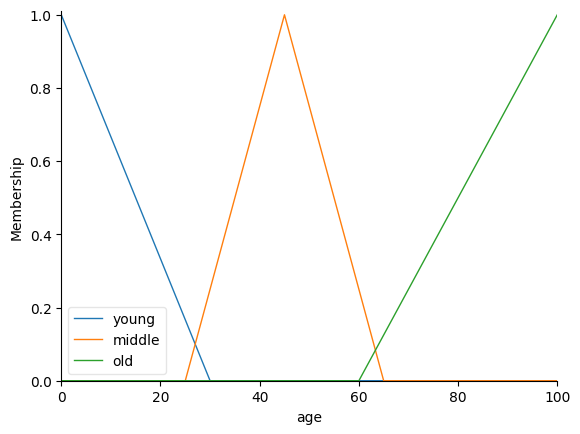

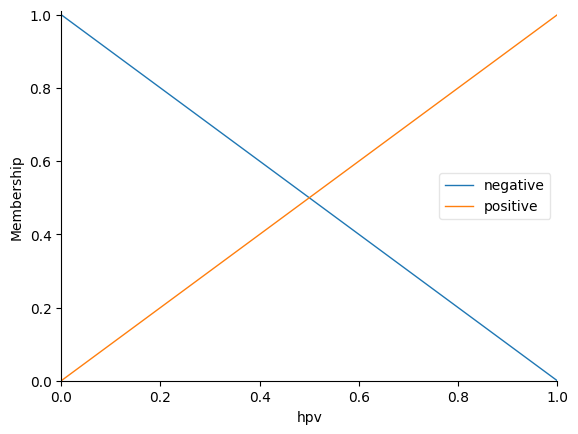

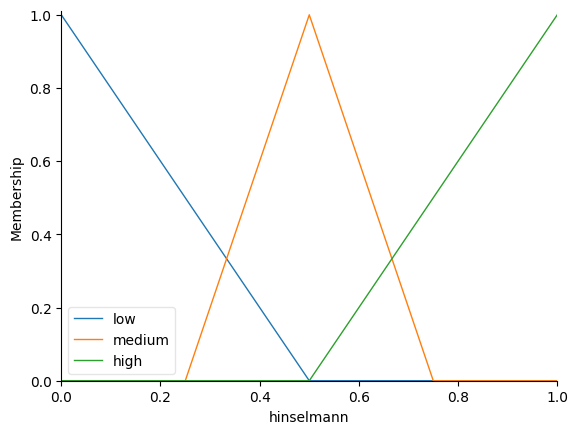

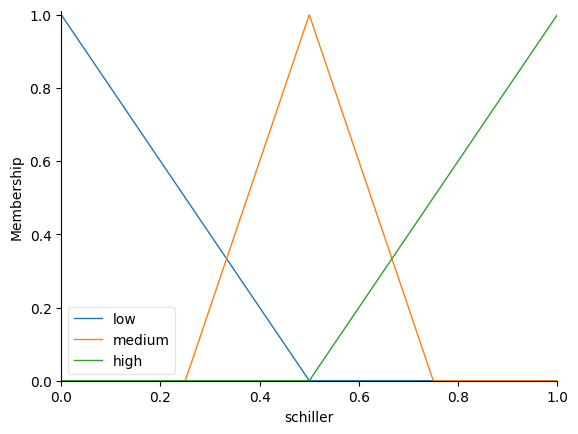

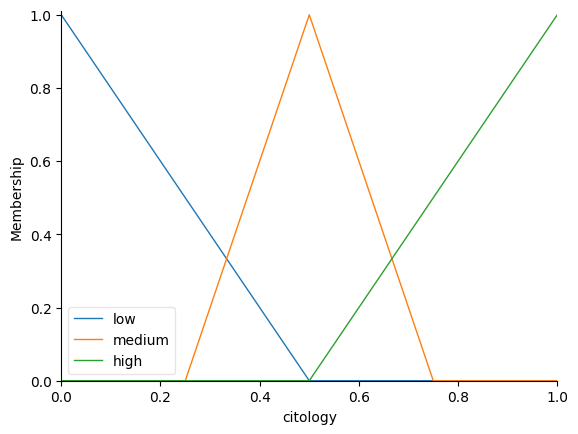

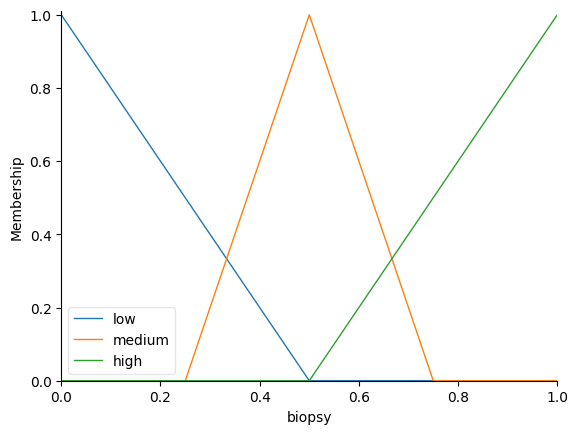

In [ ]:
# Age membership functions
age['young'] = fuzz.trimf(age.universe, [0, 0, 30])
age['middle'] = fuzz.trimf(age.universe, [25, 45, 65])
age['old'] = fuzz.trimf(age.universe, [60, 100, 100])

# HPV membership functions
hpv['negative'] = fuzz.trimf(hpv.universe, [0, 0, 0])
hpv['positive'] = fuzz.trimf(hpv.universe, [1, 1, 1])

# Output membership functions
for output in [hinselmann, schiller, citology, biopsy]:
    output['low'] = fuzz.trimf(output.universe, [0, 0, 0.5])
    output['medium'] = fuzz.trimf(output.universe, [0.25, 0.5, 0.75])
    output['high'] = fuzz.trimf(output.universe, [0.5, 1, 1])

# Visualize membership functions
age.view()
hpv.view()
hinselmann.view()
schiller.view()
citology.view()
biopsy.view()
plt.show()

In [ ]:
# Define fuzzy rules
rule1 = ctrl.Rule(age['young'] & hpv['negative'],
                  (hinselmann['low'], schiller['low'], citology['low'], biopsy['low']))
rule2 = ctrl.Rule(age['young'] & hpv['positive'],
                  (hinselmann['medium'], schiller['medium'], citology['medium'], biopsy['medium']))
rule3 = ctrl.Rule(age['middle'] & hpv['negative'],
                  (hinselmann['low'], schiller['low'], citology['low'], biopsy['low']))
rule4 = ctrl.Rule(age['middle'] & hpv['positive'],
                  (hinselmann['high'], schiller['high'], citology['high'], biopsy['high']))
rule5 = ctrl.Rule(age['old'] & hpv['negative'],
                  (hinselmann['medium'], schiller['medium'], citology['medium'], biopsy['medium']))
rule6 = ctrl.Rule(age['old'] & hpv['positive'],
                  (hinselmann['high'], schiller['high'], citology['high'], biopsy['high']))

# Create control system
cancer_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
cancer_simulation = ctrl.ControlSystemSimulation(cancer_ctrl)

For Age: 25, HPV: Negative
Hinselmann: 0.23
Schiller: 0.23
Citology: 0.23
Biopsy: 0.23



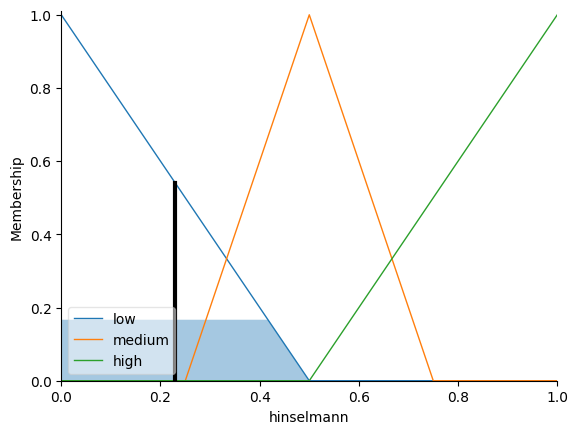

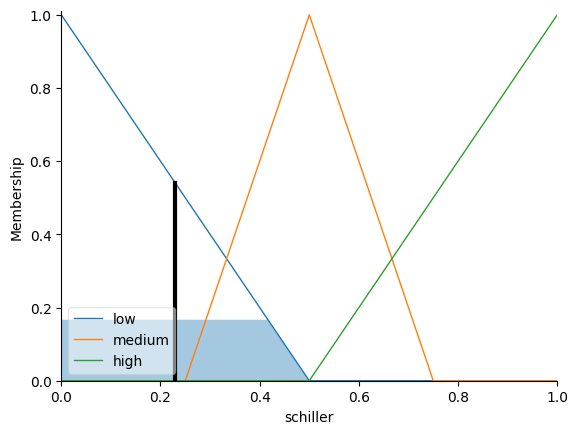

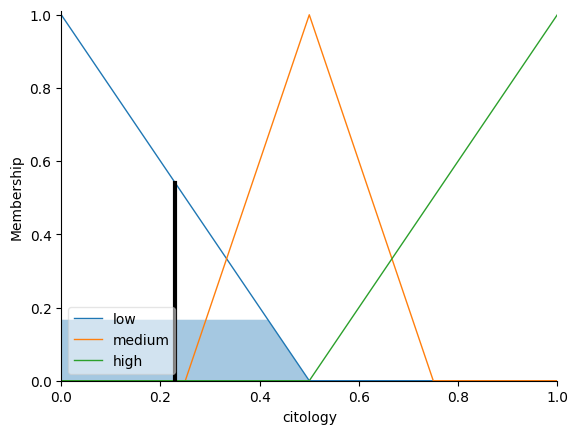

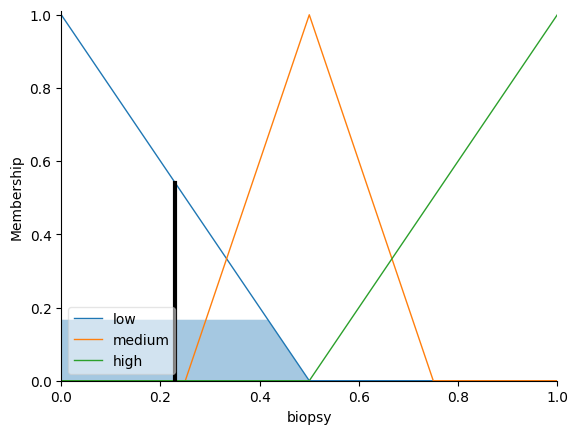

For Age: 25, HPV: Positive
Hinselmann: 0.50
Schiller: 0.50
Citology: 0.50
Biopsy: 0.50



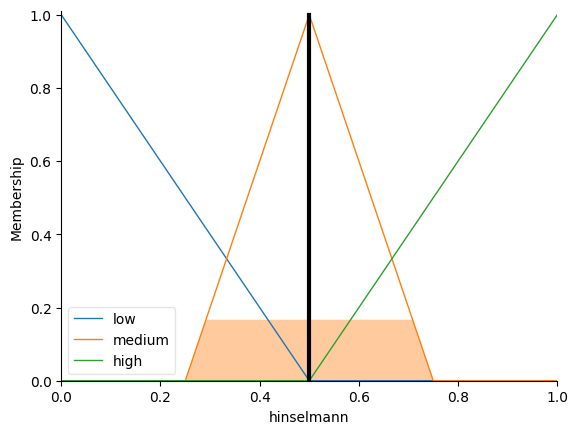

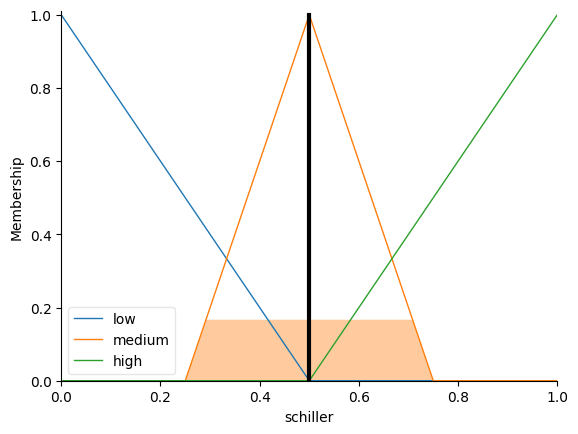

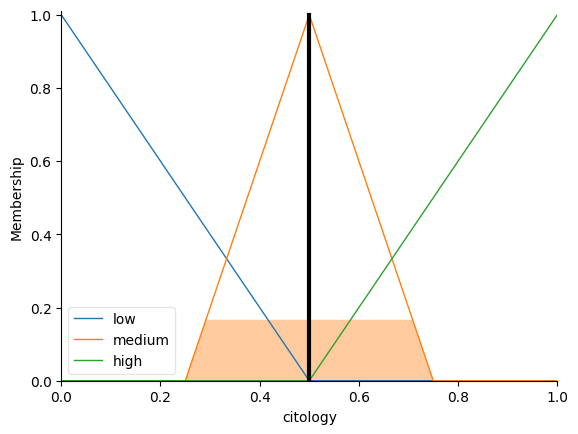

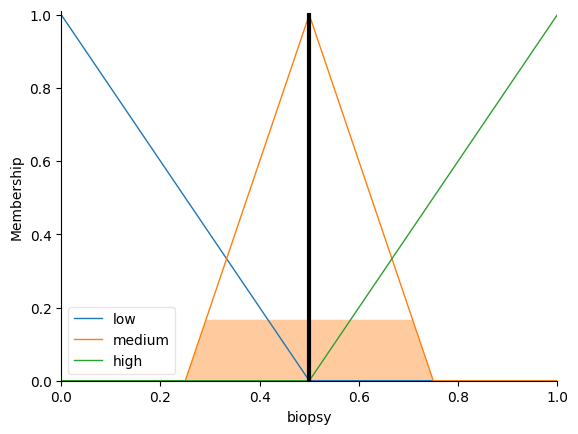

For Age: 40, HPV: Negative
Hinselmann: 0.18
Schiller: 0.18
Citology: 0.18
Biopsy: 0.18



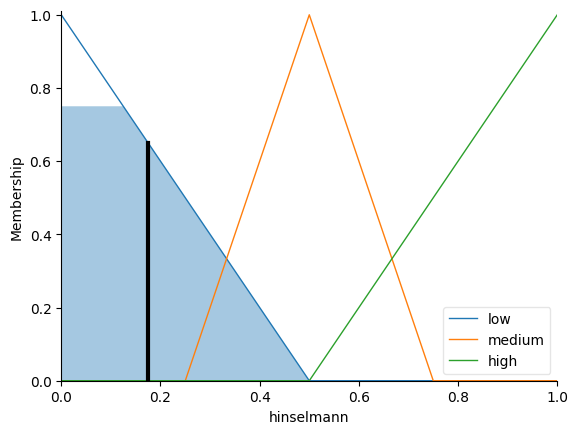

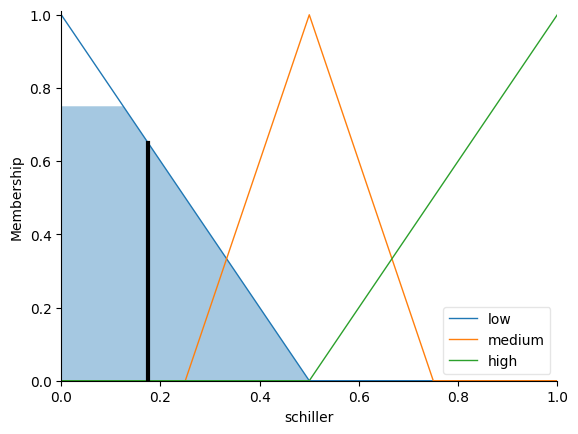

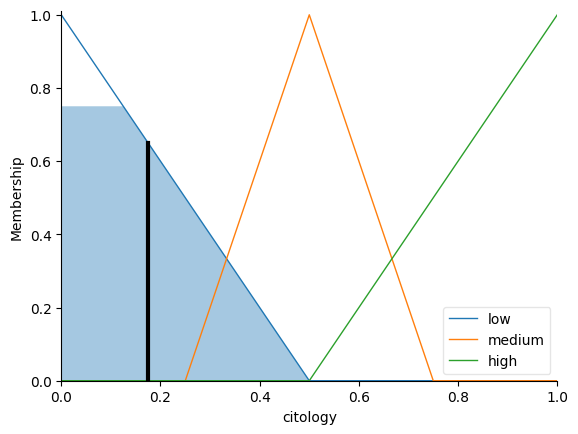

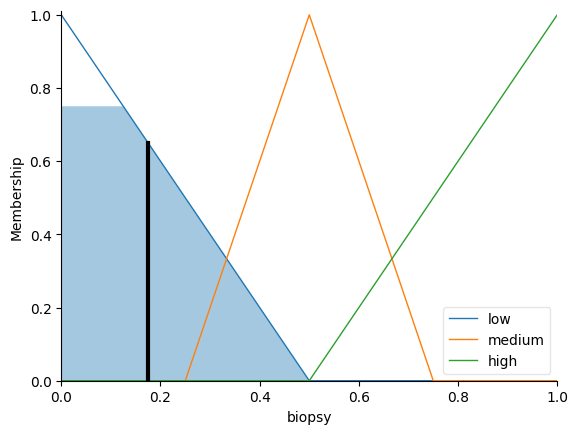

For Age: 40, HPV: Positive
Hinselmann: 0.83
Schiller: 0.83
Citology: 0.83
Biopsy: 0.83



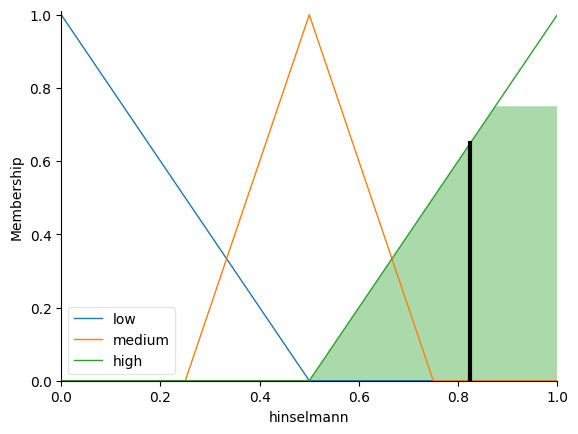

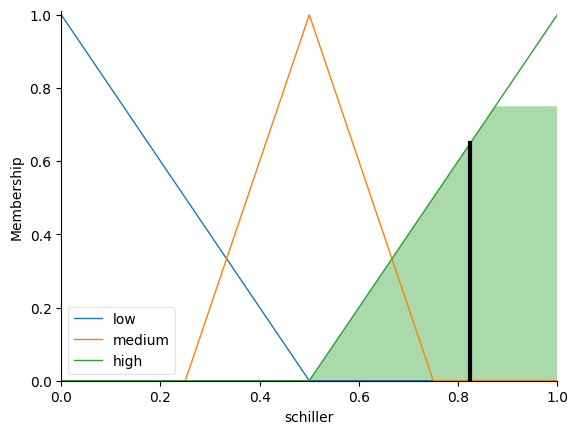

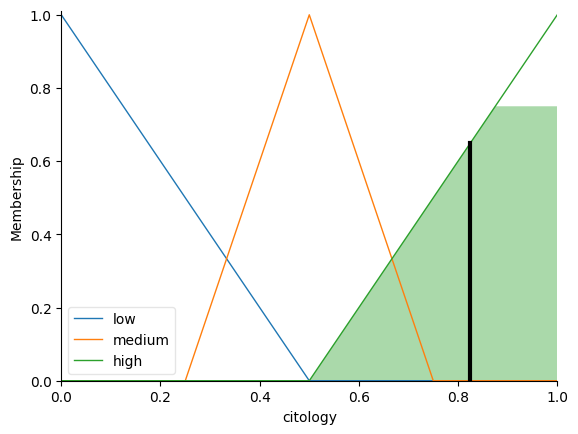

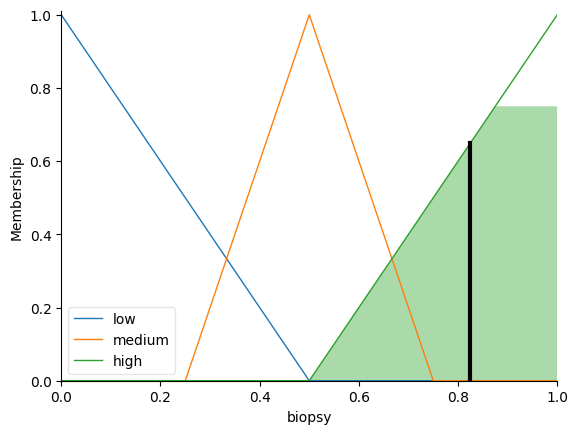

For Age: 70, HPV: Negative
Hinselmann: 0.50
Schiller: 0.50
Citology: 0.50
Biopsy: 0.50



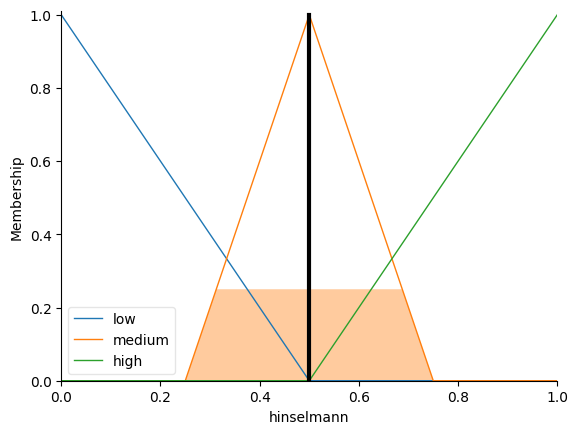

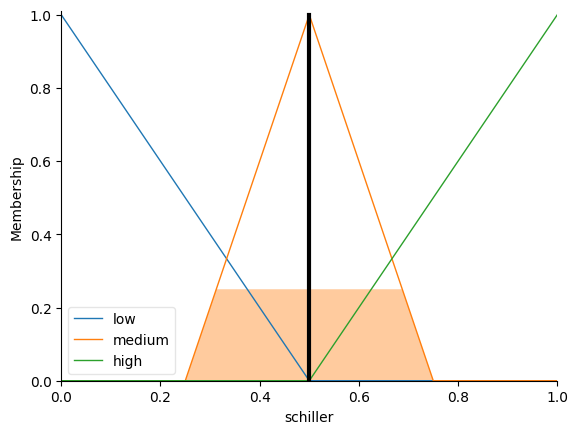

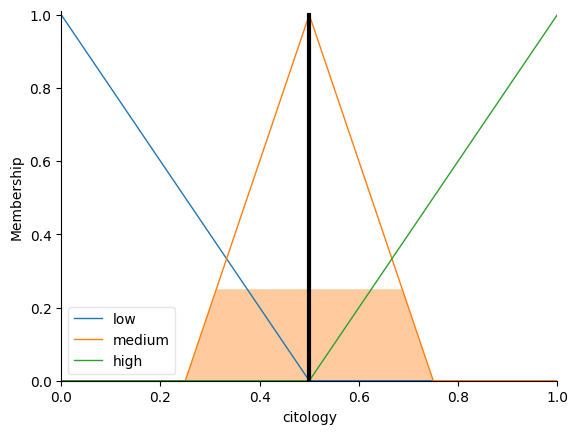

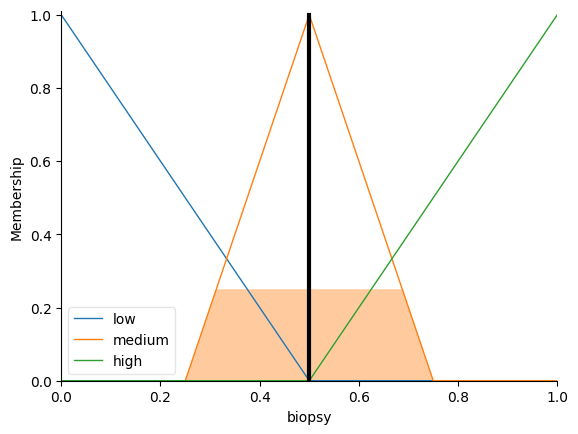

For Age: 70, HPV: Positive
Hinselmann: 0.78
Schiller: 0.78
Citology: 0.78
Biopsy: 0.78



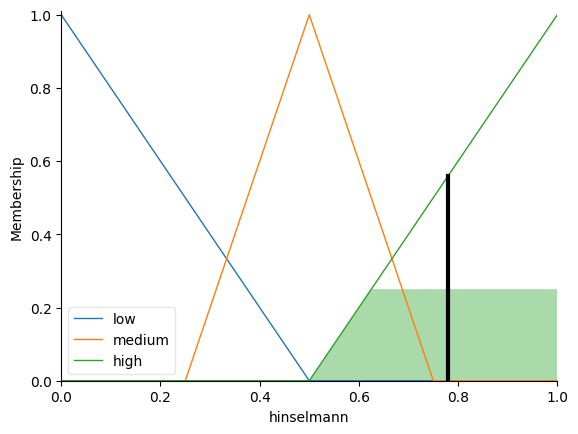

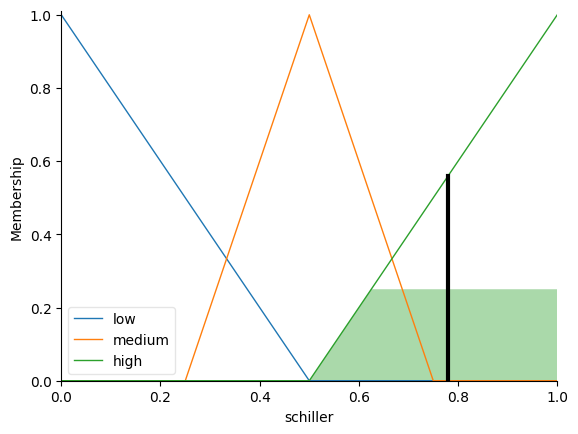

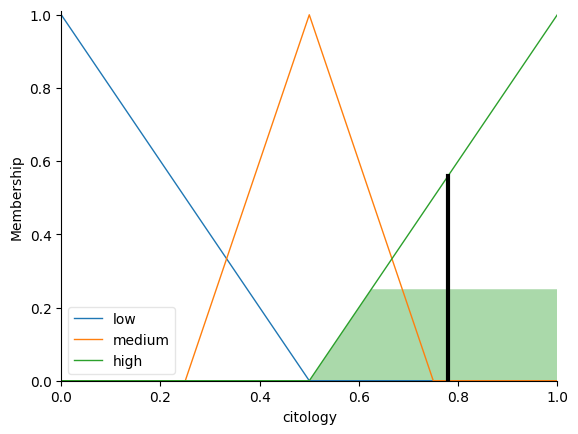

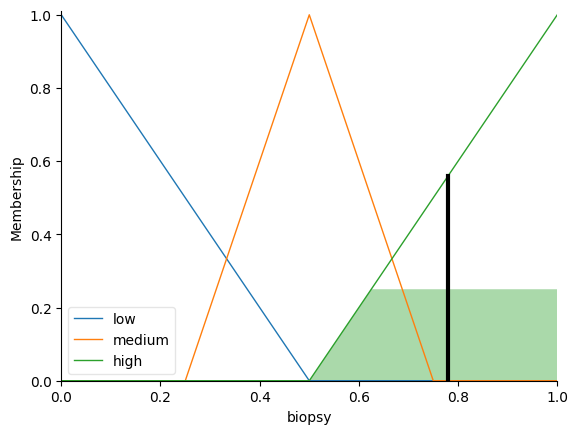

In [ ]:
def test_system(age_val, hpv_val):
    cancer_simulation.input['age'] = age_val
    cancer_simulation.input['hpv'] = hpv_val

    cancer_simulation.compute()

    print(f"For Age: {age_val}, HPV: {'Positive' if hpv_val else 'Negative'}")
    print(f"Hinselmann: {cancer_simulation.output['hinselmann']:.2f}")
    print(f"Schiller: {cancer_simulation.output['schiller']:.2f}")
    print(f"Citology: {cancer_simulation.output['citology']:.2f}")
    print(f"Biopsy: {cancer_simulation.output['biopsy']:.2f}")
    print()

    # Visualize the results
    hinselmann.view(sim=cancer_simulation)
    schiller.view(sim=cancer_simulation)
    citology.view(sim=cancer_simulation)
    biopsy.view(sim=cancer_simulation)
    plt.show()

# Test cases
test_system(25, 0)  # Young age, HPV negative
test_system(25, 1)  # Young age, HPV positive
test_system(40, 0)  # Middle age, HPV negative
test_system(40, 1)  # Middle age, HPV positive
test_system(70, 0)  # Old age, HPV negative
test_system(70, 1)  # Old age, HPV positive

**(b) Neural Network**

In [ ]:
# Define the model architecture
model = Sequential()

# Input layer and first hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Second hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Third hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Fourth hidden layer with 16 neurons and ReLU activation
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output layer with 4 neuron and sigmoid activation (for binary classification)
model.add(Dense(4, activation='sigmoid'))

# Compile the model with Adam optimizer and a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled, #Training features
    y_train, # Training labels
    epochs=100, #Number of epochs
    batch_size=32, # Batch size
    validation_data=(X_val_scaled, y_val), #Validation deatures and labels
)

Epoch 1/100
19/19 [==============================] - 3s 21ms/step - loss: 0.9138 - accuracy: 0.1600 - val_loss: 0.6727 - val_accuracy: 0.1047
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.8483 - accuracy: 0.1967 - val_loss: 0.6556 - val_accuracy: 0.1047
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.8326 - accuracy: 0.1917 - val_loss: 0.6327 - val_accuracy: 0.0581
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7724 - accuracy: 0.2300 - val_loss: 0.6148 - val_accuracy: 0.0349
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7527 - accuracy: 0.2017 - val_loss: 0.5999 - val_accuracy: 0.0465
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7180 - accuracy: 0.2033 - val_loss: 0.5840 - val_accuracy: 0.0465
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.7029 - accuracy: 0.1917 - val_loss: 0.5682 - val_accuracy: 0.0349
Epoch 8/100


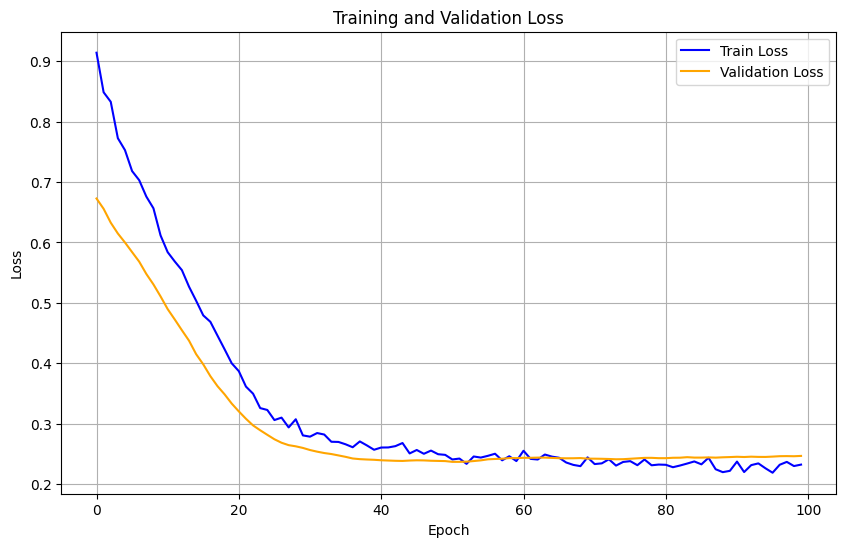

In [ ]:
from matplotlib import pyplot as plt

loss_train = history.history['loss']
loss_val = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss_train, label='Train Loss', color='blue')
plt.plot(loss_val, label='Validation Loss', color='orange')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose = 1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
# Train the model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, model_checkpoint]  # Include callbacks here
)

Epoch 1/100
14/19 [=====================>........] - ETA: 0s - loss: 0.2279 - accuracy: 0.1027
Epoch 1: val_loss improved from inf to 0.24649, saving model to best_model.h5
19/19 [==============================] - 0s 18ms/step - loss: 0.2246 - accuracy: 0.0983 - val_loss: 0.2465 - val_accuracy: 0.0349
Epoch 2/100
 8/19 [===========>..................] - ETA: 0s - loss: 0.2341 - accuracy: 0.1133

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/19 [=====================>........] - ETA: 0s - loss: 0.2216 - accuracy: 0.1094
Epoch 2: val_loss improved from 0.24649 to 0.24544, saving model to best_model.h5
19/19 [==============================] - 0s 16ms/step - loss: 0.2314 - accuracy: 0.0967 - val_loss: 0.2454 - val_accuracy: 0.0349
Epoch 3/100
17/19 [=========================>....] - ETA: 0s - loss: 0.2262 - accuracy: 0.0846
Epoch 3: val_loss did not improve from 0.24544
19/19 [==============================] - 0s 11ms/step - loss: 0.2198 - accuracy: 0.0833 - val_loss: 0.2455 - val_accuracy: 0.0349
Epoch 4/100
11/19 [================>.............] - ETA: 0s - loss: 0.1968 - accuracy: 0.0682
Epoch 4: val_loss did not improve from 0.24544
19/19 [==============================] - 0s 8ms/step - loss: 0.2346 - accuracy: 0.0867 - val_loss: 0.2467 - val_accuracy: 0.0349
Epoch 5/100
11/19 [================>.............] - ETA: 0s - loss: 0.2301 - accuracy: 0.1023
Epoch 5: val_loss did not improve from 0.24544
19/19 [=============

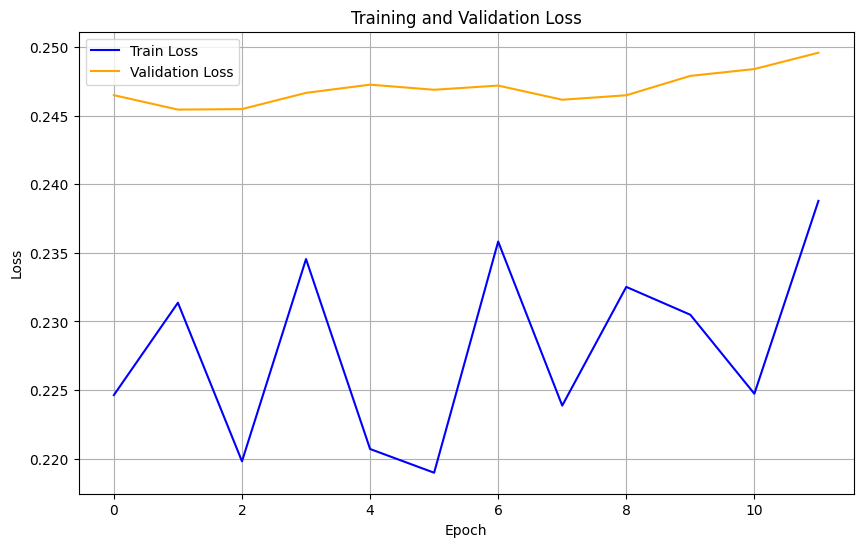

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss_train, label='Train Loss', color='blue')
plt.plot(loss_val, label='Validation Loss', color='orange')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def fuzzy_to_binary(value):
    return 1 if value >= 0.5 else 0

def predict(age_val, hpv_val):
    cancer_simulation.input['age'] = age_val
    cancer_simulation.input['hpv'] = int(hpv_val)  # Convert bool to int (0 or 1)
    cancer_simulation.compute()
    return [
        fuzzy_to_binary(cancer_simulation.output['hinselmann']),
        fuzzy_to_binary(cancer_simulation.output['schiller']),
        fuzzy_to_binary(cancer_simulation.output['citology']),
        fuzzy_to_binary(cancer_simulation.output['biopsy'])
    ]

# Make predictions
y_pred = []
for _, row in X_test.iterrows():
    y_pred.append(predict(row['Age'], row['STDs:HPV']))

y_pred = np.array(y_pred)
y_true = y_test.values

# Generate reports for each target
targets = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

for i, target in enumerate(targets):
    print(f"\nMetrics for {target}:")
    print(classification_report(y_true[:, i], y_pred[:, i]))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true[:, i], y_pred[:, i]))
    print(f"Accuracy Score: {accuracy_score(y_true[:, i], y_pred[:, i])}")


Metrics for Hinselmann:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       161
           1       0.00      0.00      0.00        11

    accuracy                           0.93       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.93      0.90       172

Confusion Matrix:
[[160   1]
 [ 11   0]]
Accuracy Score: 0.9302325581395349

Metrics for Schiller:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       164
           1       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172

Confusion Matrix:
[[163   1]
 [  8   0]]
Accuracy Score: 0.9476744186046512

Metrics for Citology:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       155
           1  

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Load the best model
best_model = load_model('best_model.h5')

# Ensure that X_test and y_test are numpy arrays of appropriate types
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

# Evaluate the model on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred_proba = best_model.predict(X_test)

# Convert predictions to binary values (0 or 1) based on a threshold of 0.5
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Ensure y_test is a DataFrame and check column names
if isinstance(y_test, pd.DataFrame):
    print("y_test columns:", y_test.columns)
else:
    raise ValueError("y_test is not a DataFrame")

# Generate classification reports and confusion matrices for each target
targets = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

for i, target in enumerate(targets):
    if target in y_test.columns:
        print(f'\nClassification Report for {target}:')
        print(classification_report(y_test[target], y_pred_binary[:, i]))

        print(f'\nConfusion Matrix for {target}:')
        print(confusion_matrix(y_test[target], y_pred_binary[:, i]))
    else:
        print(f"Column {target} is not present in y_test")

# Calculate and print overall accuracy score
overall_accuracy = accuracy_score(
    np.concatenate([y_test[target].values.reshape(-1, 1) for target in targets], axis=1),
    np.concatenate([y_pred_binary[:, i].reshape(-1, 1) for i in range(len(targets))], axis=1)
)
print(f"\nOverall Accuracy Score: {overall_accuracy}")


6/6 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.1163
Test Loss: 0.5906426906585693
Test Accuracy: 0.11627907305955887
6/6 [==============================] - 0s 2ms/step
y_test columns: Index(['Biopsy', 'Hinselmann', 'Schiller', 'Citology'], dtype='object')

Classification Report for Hinselmann:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73       164
           1       0.04      0.38      0.08         8

    accuracy                           0.59       172
   macro avg       0.50      0.49      0.41       172
weighted avg       0.91      0.59      0.70       172


Confusion Matrix for Hinselmann:
[[98 66]
 [ 5  3]]

Classification Report for Schiller:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       155
           1       0.36      0.29      0.32        17

    accuracy                           0.88       172
   macro avg       0.64      0.62    